In [1]:
# TensorFlow Classifier
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Separable synthetic data to work with: two classes of points in a 2D plane with normal distribution.

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

#Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

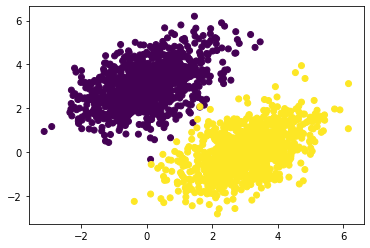

In [3]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [7]:
# Creating the linear classifier variables

# The inputs will be 2D points.
input_dim = 2
# The output predictions will be a single score per sample (close to 0 if the sample is predicted to
# be in class 0, and close to 1 if the sample is predicted to be in class 1).
output_dim = 1

# Initialize Weights ramdomly
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# The forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

# The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
                          
                          
# The training step function
learning_rate = 0.1

def training_step(inputs, targets):
    # Forward pass, inside a gradient tapescop
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    # Retrieve the gradient of the loss with regard to weights
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Update the weights.
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [5]:
# The batch training loop (instead of minibatch)
for step in range(50):
    loss = training_step(inputs, targets)
    if (step +1) % 10 == 0:
        print(f"Loss at step {step}: {loss:.4f}")

Loss at step 9: 0.0777
Loss at step 19: 0.0465
Loss at step 29: 0.0339
Loss at step 39: 0.0288
Loss at step 49: 0.0268


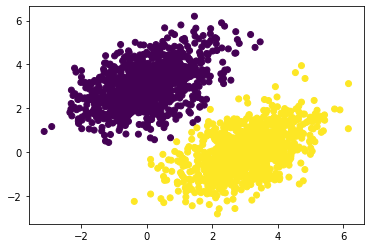

In [6]:
# plot of how our linear model classifies the training data points
predictions = model(inputs)

# Because our targets are zeros and ones, a given input point will be classified as “0” 
# if its prediction value is below 0.5, and as “1” if it is above 0.5

plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()